# Demo RNA Multi-Perceptrón Backpropagation con TensorFlow para identificar TIPOS de ANIMALES
Adaptado de https://www.tensorflow.org/tutorials/estimator/premade

1) Cargar librerías:

In [1]:
#@title Librerías a usar
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Librerías cargadas")

Librerías cargadas


2) Cargar los datos:

In [2]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demo ANIMALES'  #@param {type:"string"}

Mounted at /content/gdrive


3) Cargar y prepar los datos:

In [3]:
## selección de los parámetros 

#@markdown ### Archivo de datos a utilizar:
archivo_datos = '/datos/animales.csv'  #@param {type:"string"}
#@markdown ### Nombre del atributo clase / objetivo:
atributo_clase = 'TIPO' #@param {type:"string"}
#@markdown ### Descripción de los valores del atributo clase / objetivo:  (nota: siempre debe comienzar en 0, por lo que si no tiene valor 0, agregar "na")
nombre_clases = 'na, MAMIFERO, AVE, REPTIL, PEZ, ANFIBIO, INSECTO, INVERTEBRADO' #@param {type:"string"}
#@markdown ### Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   70#@param {type:"integer"}

## aplicación de los parámetros elegidos

# define nombre atributo de CLASE para ejemplo ANIMALES
ClassAttributeName = atributo_clase

# define valores de clases para ejemplo ANIMALES
CLASES = [ ]
for val in nombre_clases.split(','):
  CLASES.append( val )

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

print("Configuración definida de ", archivo_datos)
print("Atributo clase: ", ClassAttributeName, ": ", CLASES)

Configuración definida de  /datos/animales.csv
Atributo clase:  TIPO :  ['na', ' MAMIFERO', ' AVE', ' REPTIL', ' PEZ', ' ANFIBIO', ' INSECTO', ' INVERTEBRADO']


In [4]:
#@title Cargar datos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos)
print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())

# genera los datos solo con la clase para entrenar y probar
Y = df.pop(ClassAttributeName)
X = df

# genera lista de columnas de entrada    
my_feature_columns = []
for key in X.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))



> Cabecera: 
   TIENE_PELO  TIENE_PLUMAS  PONE_HUEVOS  DA_LECHE  ES_AEREO  ES_ACUATICO  \
0           1             0            0         1         0            0   
1           1             0            0         1         0            0   
2           0             0            1         0         0            1   
3           1             0            0         1         0            0   
4           1             0            0         1         0            0   

   ES_PREDADOR  TIENE_DIENTES  TIENE_COLUMNA  RESPIRA  ES_VENENOSO  \
0            1              1              1        1            0   
1            0              1              1        1            0   
2            1              1              1        0            0   
3            1              1              1        1            0   
4            1              1              1        1            0   

   TIENE_ALETAS  CANT_PATAS  TIENE_COLA  ES_DOMESTICO  TIPO  
0             0           4           0 

In [5]:
#@title Preparar datos

# separa al azar usando muestreo estratificado con proporción indicada
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain), stratify=Y)

# muestra resultados
print("> Para Ambos: ")
print(" - dictMapeo: ", CLASES)

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for i in range(len(CLASES)):
  cant = 0
  for y in y_train:
    if i == y: cant = cant + 1
  print("    ", CLASES[i], "[", i, "]:", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for i in range(len(CLASES)):
  cant = 0
  for y in y_test:
    if i == y: cant = cant + 1
  print("    ", CLASES[i], "[", i, "]:", cant)


> Para Ambos: 
 - dictMapeo:  ['na', ' MAMIFERO', ' AVE', ' REPTIL', ' PEZ', ' ANFIBIO', ' INSECTO', ' INVERTEBRADO']

> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (70, 15)
 - y_train (cant):  70
     na [ 0 ]: 0
      MAMIFERO [ 1 ]: 28
      AVE [ 2 ]: 14
      REPTIL [ 3 ]: 3
      PEZ [ 4 ]: 9
      ANFIBIO [ 5 ]: 3
      INSECTO [ 6 ]: 6
      INVERTEBRADO [ 7 ]: 7

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (31, 15)
 - y_test (cant):  31
     na [ 0 ]: 0
      MAMIFERO [ 1 ]: 13
      AVE [ 2 ]: 6
      REPTIL [ 3 ]: 2
      PEZ [ 4 ]: 4
      ANFIBIO [ 5 ]: 1
      INSECTO [ 6 ]: 2
      INVERTEBRADO [ 7 ]: 3


4) Establecer el modelo para la RNA

In [6]:
#@title Establecer el modelo

rna_cant_neuronas_capas_ocultas = '35, 25, 15' #@param {type:"string"}
rna_cant_epocas_entrenamiento = 10000 #@param {type:"integer"}

# cantidad de neuronas ocultas 
hidden_layers = []
for val in rna_cant_neuronas_capas_ocultas.split(','):
  hidden_layers.append( int(val) )

# cantidad de épocas del entrenamiento
cantEpocas = (100 if rna_cant_epocas_entrenamiento<1 else rna_cant_epocas_entrenamiento)

# Construye un estimador tipo RNA 'Deep' Neuronal Network classifier
classifier = tf.estimator.DNNClassifier(
    
    feature_columns=my_feature_columns,

    hidden_units=hidden_layers, #  neuronas ocultas    
    
    n_classes=len(CLASES)) # identifica clases


print("\nConfiguración de RNA MLP Backpropagation definida: [", len(my_feature_columns), hidden_layers, len(CLASES)," ] ")
print(classifier)

# función auxiliar para preparar datos de entrenamiento y prueba
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1h8qrt9n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

Configuración de RNA MLP Backpropagation definida: [ 15 [35, 25, 15] 8  ] 



5) Entrenar el modelo de la RNA:

In [7]:
#@title Entrenar

# Entrena el modelo
classifier.train(
    input_fn=lambda: input_fn(x_train, y_train, training=True),
    steps=cantEpocas) 

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1h8qrt9n/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.9981847, step = 0
INFO:tensorflow:global_step/sec: 287.574
INFO:tensorflow:loss = 1.8953547, step = 100 (0.349 sec)
INFO:tensorflow:global_step/sec: 367.749
INFO:tensorflow:loss = 1.8225774, step = 200 (0.272 sec)
INFO:tensorflow:global_step/sec

6) Evaluar el modelo de la RNA entrenado:

In [8]:
#@title Evaluar el modelo con datos de prueba
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(x_test, y_test, training=False))

print('\nExactitud: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-26T20:30:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1h8qrt9n/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.28000s
INFO:tensorflow:Finished evaluation at 2020-11-26-20:30:07
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.9032258, average_loss = 0.44317588, global_step = 10000, loss = 0.44317588
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmp1h8qrt9n/model.ckpt-10000

Exactitud: 0.903



7) Mostrar el detalle con predicciones sobre datos de Prueba:


 Resultados: 
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1h8qrt9n/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Clase predecida es " REPTIL"[3] (64.6%), la correcta es " REPTIL"[3] 
Clase predecida es " INSECTO"[6] (58.2%), la correcta es " INSECTO"[6] 
Clase predecida es " MAMIFERO"[1] (99.4%), la correcta es " MAMIFERO"[1] 
Clase predecida es " MAMIFERO"[1] (99.2%), la correcta es " MAMIFERO"[1] 
Clase predecida es " AVE"[2] (86.5%), la correcta es " AVE"[2] 
Clase predecida es " MAMIFERO"[1] (96.7%), la correcta es " MAMIFERO"[1] 
Clase predecida es " MAMIFERO"[1] (99.2%), la correcta es " MAMIFERO"[1] 
Clase predecida es " MAMIFERO"[1] (99.4%), la correcta es " MAMIFERO"[1] 
Clase predecida es " MAMIFERO"[1] (99.5%), la correcta es " MAMIFERO"[1] 
Clase predecida es " MAMIFERO"[1] (64.5%), la correcta es " MAMIFE

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


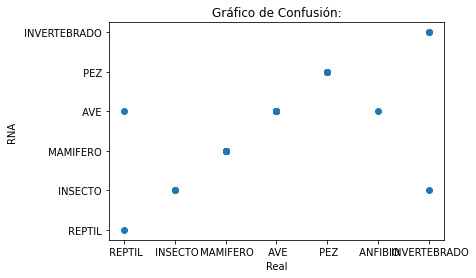

In [9]:
#@title Evaluar en detalle el modelo con datos de prueba
# funciones auxiliares
def val_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(
    input_fn=lambda: val_fn(x_test))

# muestra resultados de la predicción
classPreds = []
classReal = []
cantOK = 0
cantError = 0
print("\n Resultados: ")
for pred_dict, expec in zip(predictions, y_test):
    pred_class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][pred_class_id]
    
    classPreds.append(CLASES[pred_class_id])
    classReal.append(CLASES[expec])

    if (pred_class_id == expec): 
      res = ""
      cantOK += 1
    else: 
      res = "!"
      cantError += 1

    print('Clase predecida es "{}"[{}] ({:.1f}%), la correcta es "{}"[{}]{} '.format(
        CLASES[pred_class_id], pred_class_id, 100 * probability, CLASES[expec], expec, res))

print('=== Total Ejemplos: {}, con {} predicciones ok y {} errores.'.format(cantOK+cantError, cantOK, cantError))

# gráfico de comparación
plt.title('Gráfico de Confusión:')
plt.xlabel('Real')
plt.ylabel('RNA')
plt.scatter(classReal, classPreds)

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(classReal, classPreds))

# muestra matriz de confusion
print('\nMatriz de Confusión: ')
cm = confusion_matrix(classReal, classPreds, labels=CLASES)
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in CLASES], 
    columns=['p:{:}'.format(x) for x in CLASES]
  )
print(cmtx)
print("\n")